In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline

import glob


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

## Divergence between 2 books as a function of alpha

The function jsdalpha calculates the jsd between 2 count-files.
The count files are in the "gutenberg-format":

word \tab count \newline

In [4]:
## the data is in a different repository gutengerg/data/counts
path_read = '../../gutenberg/data/counts/'



In [33]:
fname_read = 'PG299_counts.txt'
filename1 = os.path.join(path_read,fname_read)

fname_read = 'PG304_counts.txt'
filename2 = os.path.join(path_read,fname_read)


In [34]:
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1

arr_alpha = np.linspace(-5,5,100)
arr_jsd = 0.0*arr_alpha
arr_jsd = jsdalpha(filename1,filename2,alpha=arr_alpha,weights=weights,normalized=normalized)

## note that for alpha, we can pass a float for a single value of alpha 
## or an array when measuring many values

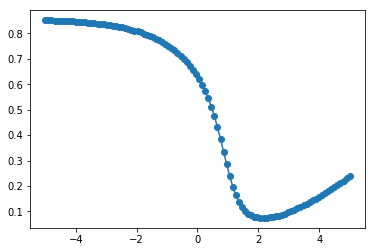

In [35]:
plt.plot(arr_alpha,arr_jsd,marker='o')

# A distribution of divergences

In [25]:
## the list of all books
list_filename = sorted(glob.glob(path_read+"*.txt"))

In [62]:
## lets look at N pairs and calculate the distribution of jsd's
N = 1000 ## 1000 pairs takes <=1min

alpha = 1.0
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1


list_jsd = []
for i in range(N):
    filename1,filename2 = np.random.choice(list_filename,size=2,replace=False)
    jsd = jsdalpha(filename1,filename2,alpha=alpha,weights=weights,normalized=normalized)
    list_jsd+=[jsd]

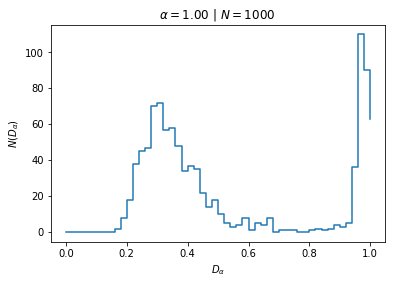

In [63]:
# plot the distribution of jsd-values

bins = np.linspace(0.0,1.0,51)
H,edges = np.histogram(list_jsd,bins=bins)
H = np.append(0,H)

plt.step(bins,H,where='post')
plt.xlabel(r'$D_{\alpha}$')
plt.ylabel(r'$N( D_{\alpha} )$')
plt.title(r'$\alpha = %.2f$ | $N = %s$ '%(alpha,N))

## An interesting observation

'../../gutenberg/data/counts/PG8284_counts.txt' is empty, i.e. there are no counts in the file anymore.
In this case, we always get JSD=1/2.